<a href="https://colab.research.google.com/github/MonikaLamba/Reinforcement-Learning/blob/main/UPPER_CONFIDENCE_BOUND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORT DATASET

In [2]:
 df = pd.read_csv("Ads_Optimisation.csv")

In [3]:
df.shape

(10000, 10)

In [4]:
df.shape[0]

10000

In [5]:
df.shape[1]

10

In [6]:
[1] * 10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [8]:
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

IMPLEMENTING UPPER CONFIDENCE BOUND

In [9]:
import math

N = df.shape[0]

d = df.shape[1]
ads_selected = []
numbers_of_selections = [1] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = df.iloc[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

In [10]:
print(total_reward)

2220


In [ ]:
ads_selected

**VISUALISING** **THE** **RESULTS**

Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

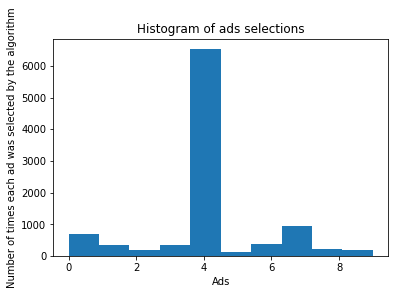

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')